In [1]:
import cloudstack as cs
import numpy as np
import pandas as pd
from IPython.display import display


In [2]:
service_offerings = np.array([cs.ServiceOffering(_id=0, CPU_count=1, MAX_MEM=1),
                     cs.ServiceOffering(1,1,2),
                     cs.ServiceOffering(2,2,2),
                     cs.ServiceOffering(3,2,4),
                     cs.ServiceOffering(4,4,4),
                     cs.ServiceOffering(5,4,8),
                     cs.ServiceOffering(6,8,16),
                     cs.ServiceOffering(7,16,32),
                     cs.ServiceOffering(8,32,64)])

In [4]:
# Experiment one
# Hint: Describe the code flow

firstfitCS = cs.CloudStack(host_count=10, policy="firstfit")

for i in range(100):
    firstfitCS.deploy_vm(f'VM#{i}' , np.random.choice(service_offerings))
    
print(firstfitCS.hosts[4])

Name: Node#4
CPU: 128 core
memory: 256GB
VMs: ['VM#79 ', 'VM#80 ', 'VM#81 ', 'VM#82 ', 'VM#83 ', 'VM#84 ', 'VM#85 ', 'VM#86 ', 'VM#87 ', 'VM#88 ', 'VM#89 ', 'VM#90 ', 'VM#91 ', 'VM#92 ', 'VM#93 ', 'VM#94 ', 'VM#95 ', 'VM#97 ', 'VM#98 ', 'VM#99 ']


In [5]:
print(firstfitCS.hosts[0].get_allocated_resources())
print(firstfitCS.hosts[0].get_free_resources())

{'CPU_allocated': 127, 'MEM_allocated': 222}
{'CPU_free': 1, 'MEM_free': 34}


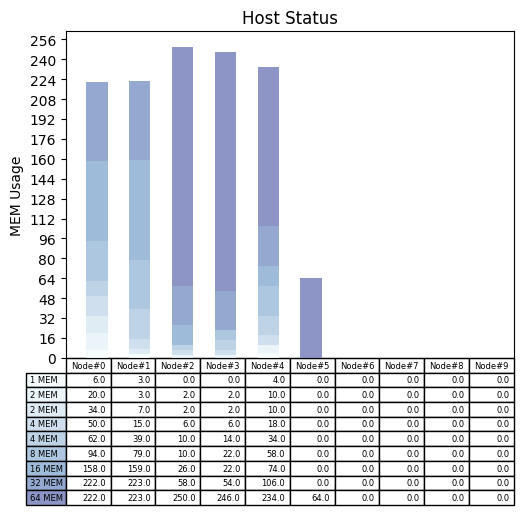

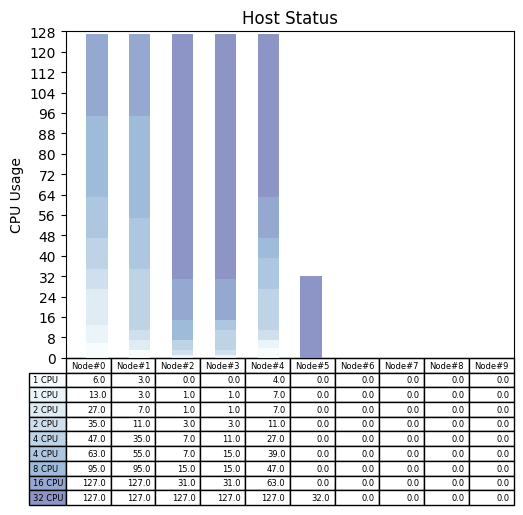

In [6]:
# Hint: Describe the chart
cs.plot_hosts_memory(firstfitCS,service_offerings)
cs.plot_hosts_CPU(firstfitCS,service_offerings)

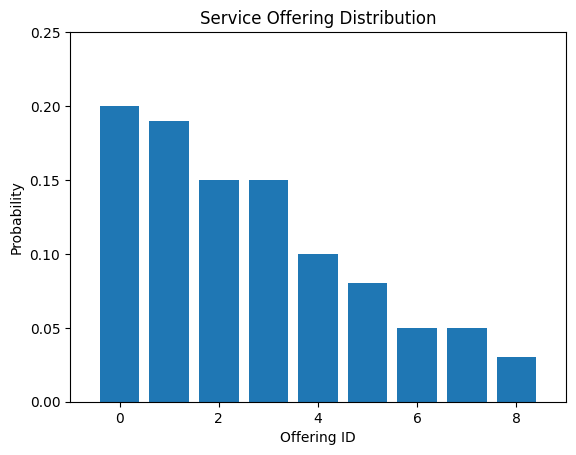

In [7]:
# What if we change the distribution?

distribution = [0.20, 0.19, 0.15, 0.15, 0.10, 0.08, 0.05, 0.05, 0.03]
cs.plot_service_offering_distribution(distribution)

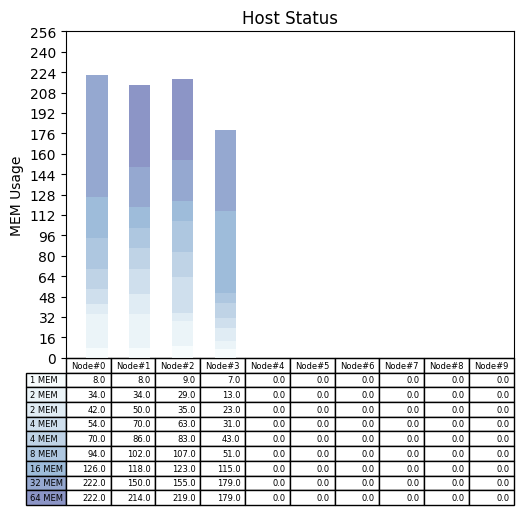

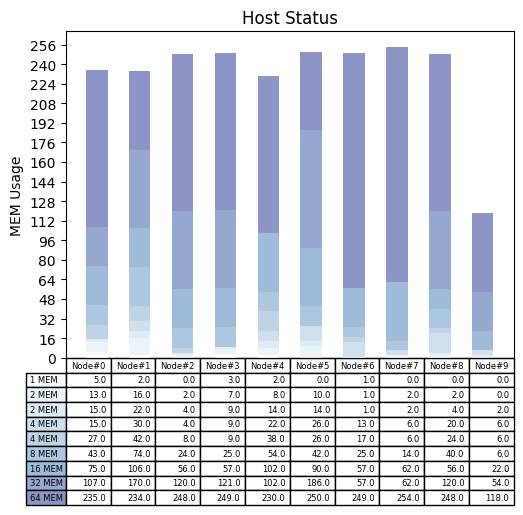

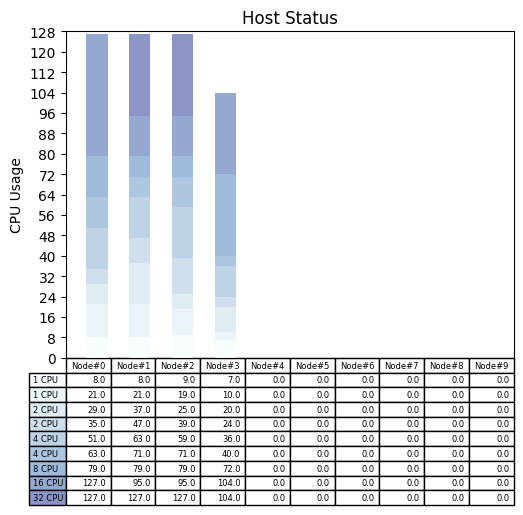

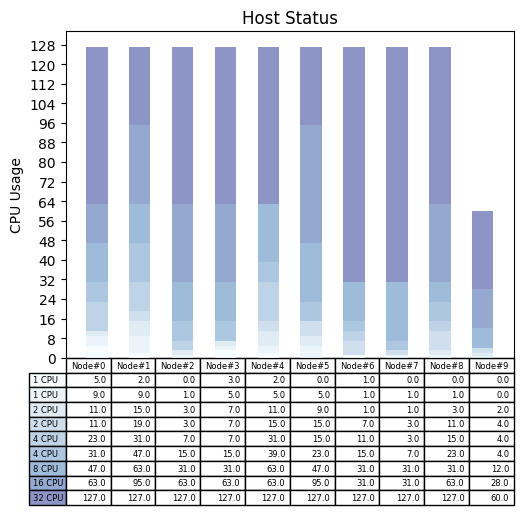

In [8]:
# Experiment two
# with distribution
ff_w_distribution = cs.CloudStack(host_count=10, policy="firstfit")

for i in range(150):
    so = np.random.choice(service_offerings,1, p=distribution)[0]
    ff_w_distribution.deploy_vm(f'VM#{i}' , so)

    
# without distribution

ff_wo_distribution = cs.CloudStack(host_count=10, policy="firstfit")
for i in range(150):
    so = np.random.choice(service_offerings,1)[0]
    ff_wo_distribution.deploy_vm(f'VM#{i}' , so)


cs.plot_hosts_memory(ff_w_distribution,service_offerings)
cs.plot_hosts_memory(ff_wo_distribution,service_offerings)

cs.plot_hosts_CPU(ff_w_distribution,service_offerings)
cs.plot_hosts_CPU(ff_wo_distribution,service_offerings)

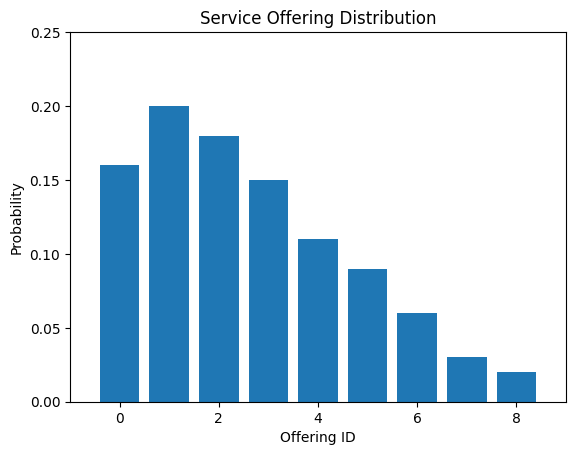

In [9]:
distribution = [0.16, 0.20, 0.18, 0.15, 0.11, 0.09, 0.06, 0.03, 0.02]
cs.plot_service_offering_distribution(distribution)

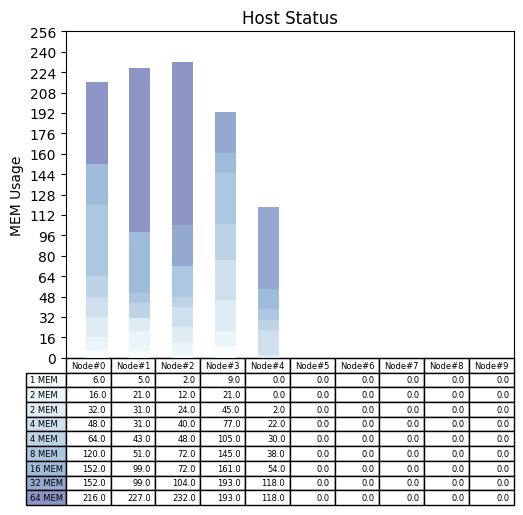

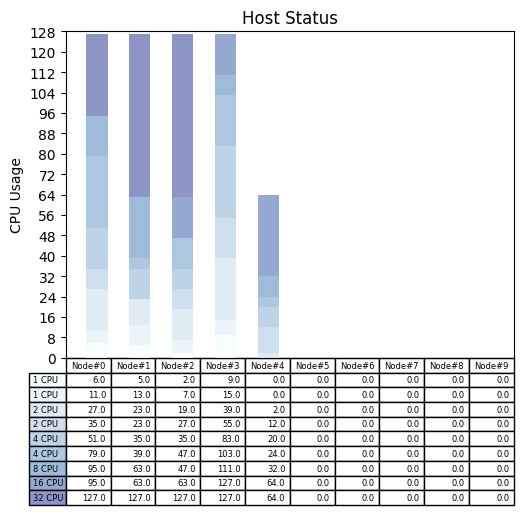

In [10]:
# Experiment three
firstfitCS = cs.CloudStack(host_count=10, policy="firstfit")

for i in range(150):
    so = np.random.choice(service_offerings,1, p=distribution)[0]
    firstfitCS.deploy_vm(f'VM#{i}' , so)


cs.plot_hosts_memory(firstfitCS,service_offerings)
cs.plot_hosts_CPU(firstfitCS,service_offerings)

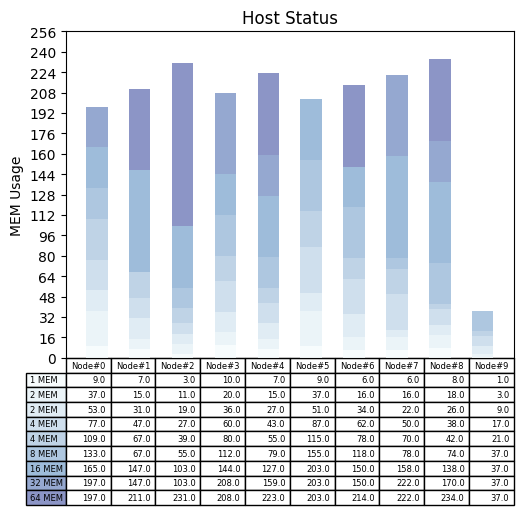

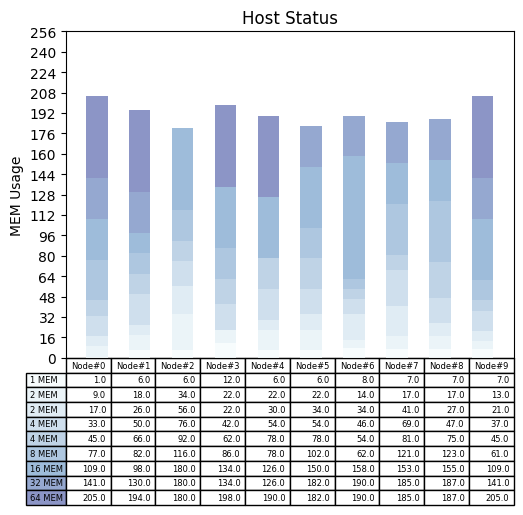

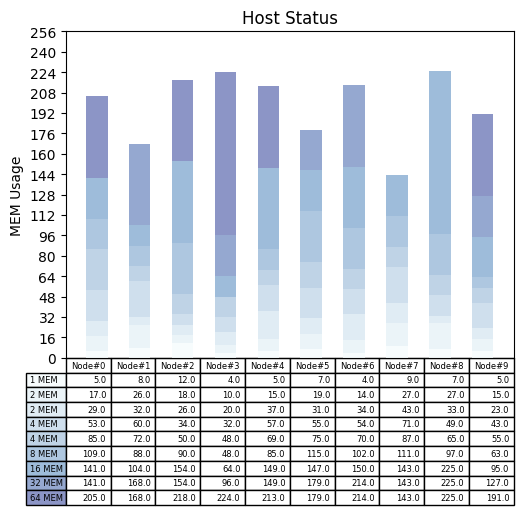

In [13]:
# Experiment four

ff = cs.CloudStack(host_count=10, policy="firstfit")
lc = cs.CloudStack(host_count=10, policy="leastconsumed")
ra = cs.CloudStack(host_count=10, policy="random")


for i in range(350):
    so = np.random.choice(service_offerings,1, p=distribution)[0]
    ff.deploy_vm(f'VM#{i}' , so)
    lc.deploy_vm(f'VM#{i}' , so)
    ra.deploy_vm(f'VM#{i}' , so)


cs.plot_hosts_memory(ff,service_offerings)
cs.plot_hosts_memory(lc,service_offerings)
cs.plot_hosts_memory(ra,service_offerings)

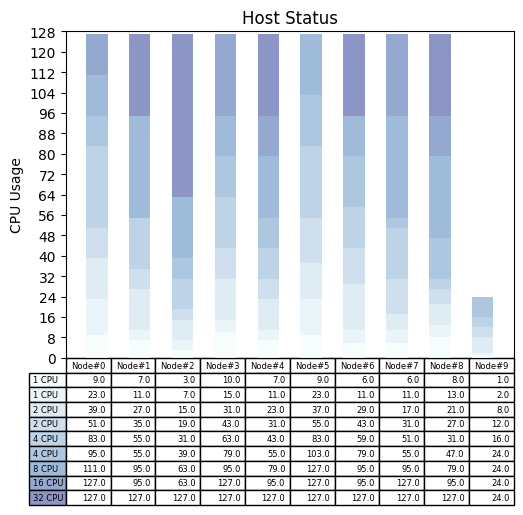

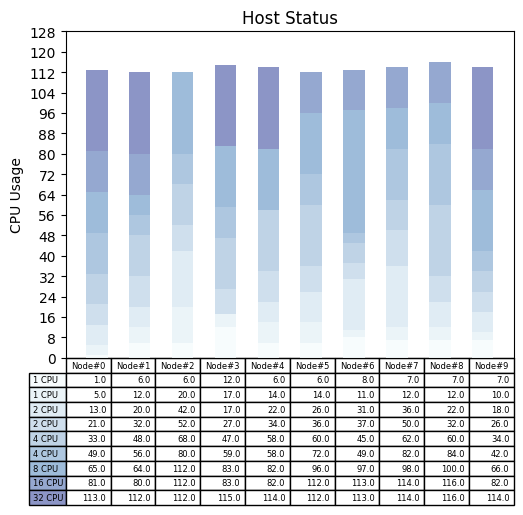

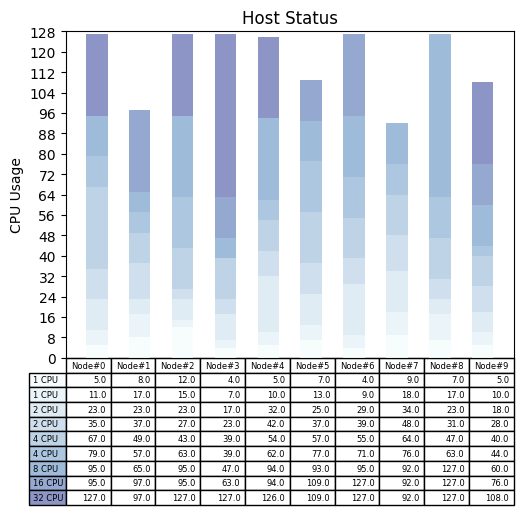

In [14]:
cs.plot_hosts_CPU(ff,service_offerings)
cs.plot_hosts_CPU(lc,service_offerings)
cs.plot_hosts_CPU(ra,service_offerings)

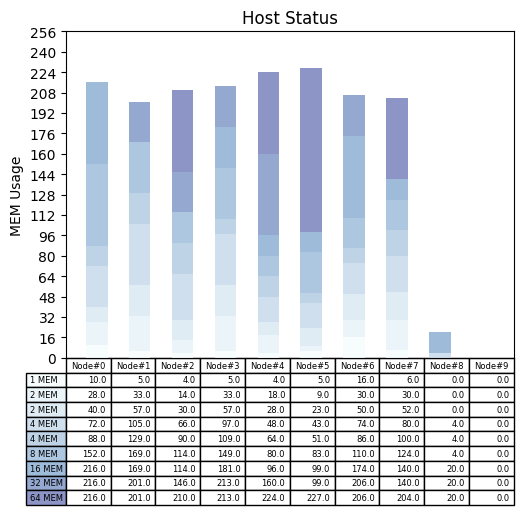

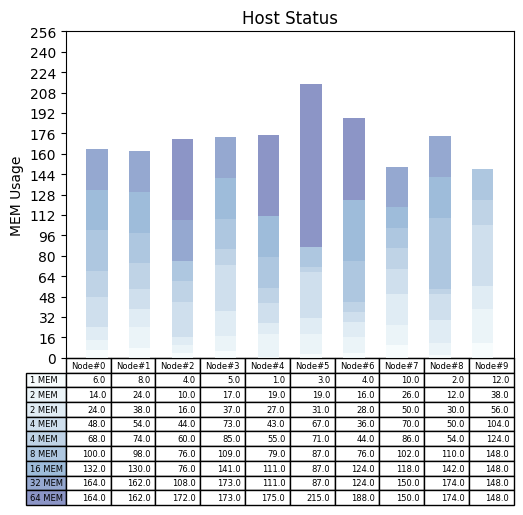

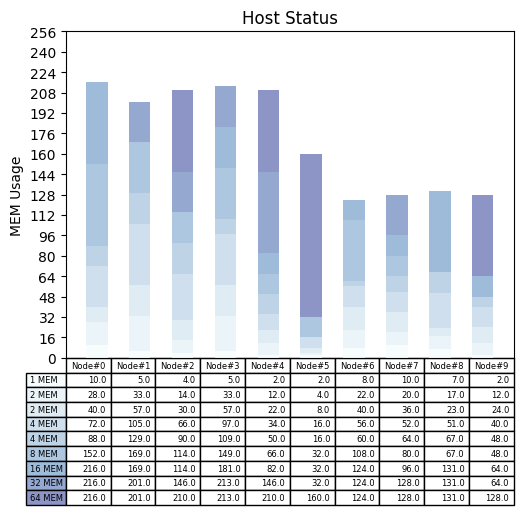

In [17]:
# Experiment five
ff = cs.CloudStack(host_count=10, policy="firstfit")
lc = cs.CloudStack(host_count=10, policy="leastconsumed")
fa = cs.CloudStack(host_count=10, policy="fuzzy", alpha=0.5)



for i in range(350):
    so = np.random.choice(service_offerings,1, p=distribution)[0]
    ff.deploy_vm(f'VM#{i}' , so)
    lc.deploy_vm(f'VM#{i}' , so)
    fa.deploy_vm(f'VM#{i}' , so)


cs.plot_hosts_memory(ff,service_offerings)
cs.plot_hosts_memory(lc,service_offerings)
cs.plot_hosts_memory(fa,service_offerings)

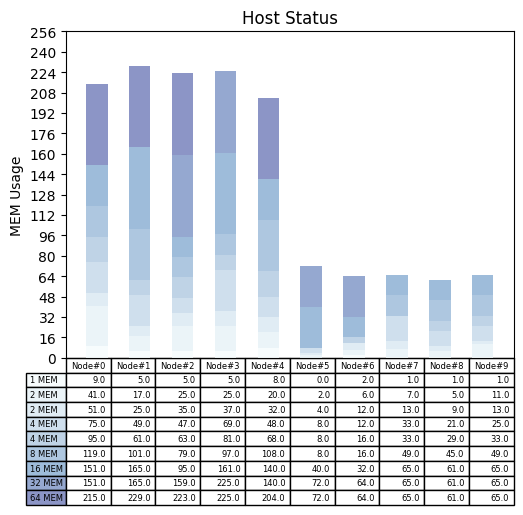

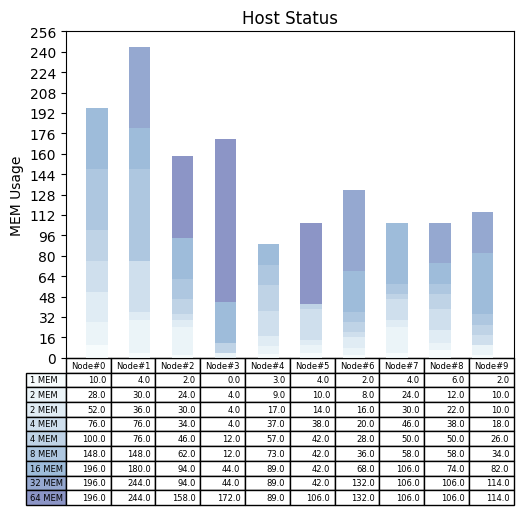

In [16]:
# Experiment six
fuzzy_ff = cs.CloudStack(host_count=10, policy="fuzzy", alpha=0.5, start_with="firstfit")
fuzzy_lc = cs.CloudStack(host_count=10, policy="fuzzy", alpha=0.5, start_with="leastconsumed")


for i in range(250):
    so = np.random.choice(service_offerings,1, p=distribution)[0]
    fuzzy_ff.deploy_vm(f'VM#{i}' , so)
    fuzzy_lc.deploy_vm(f'VM#{i}' , so)


cs.plot_hosts_memory(fuzzy_ff,service_offerings)
cs.plot_hosts_memory(fuzzy_lc,service_offerings)

In [21]:
# Experiment seven

ff = cs.CloudStack(host_count=10, policy="firstfit")
lc = cs.CloudStack(host_count=10, policy="leastconsumed")
ra = cs.CloudStack(host_count=10, policy="random")
fa = cs.CloudStack(host_count=10, policy="fuzzy", alpha=0.5)


policies = ['First Fit', 'Least Consumed', 'Random', 'Fuzzy']
DCs = [ff, lc, ra, fa]
failed = [0]*len(DCs)
score = [0]*len(DCs)

for i in range(400):
    so = np.random.choice(service_offerings,1, p=distribution)[0]
    
    # Deploy VM in every DC
    for i, dc in enumerate(DCs):
        vm = dc.deploy_vm(f'VM#{i}' , so)
        if vm is None:
            failed[i] += 1
            score[i] -= (so['MAX_MEM'] + so['MAX_MEM'] // 4)
        else:
            score[i] += so['MAX_MEM']

display(pd.DataFrame([failed, score], columns = policies, index=pd.Series(['failed VMs','score'])))

,First Fit,Least Consumed,Random,Fuzzy
failed VMs,26,9,25,18
score,2035,2002,2037,2015


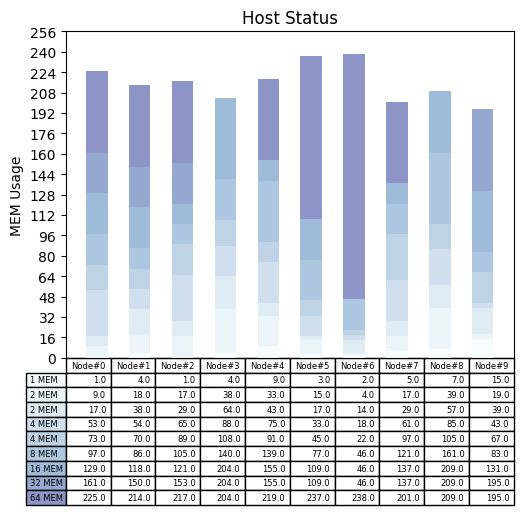

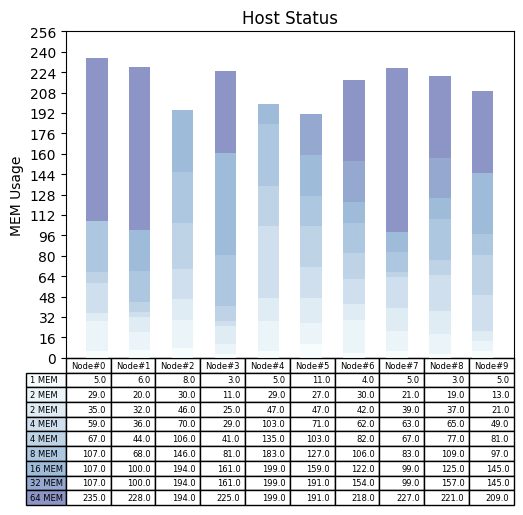

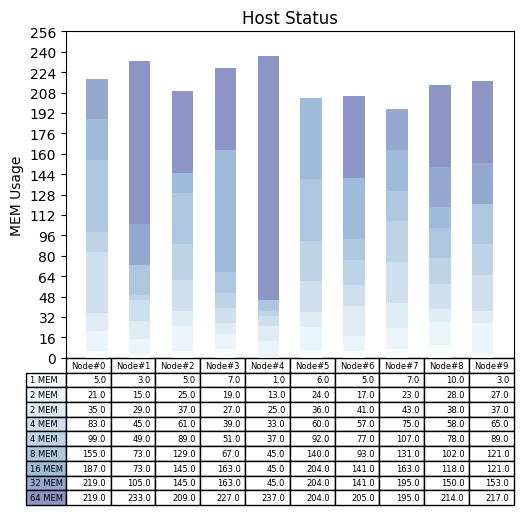

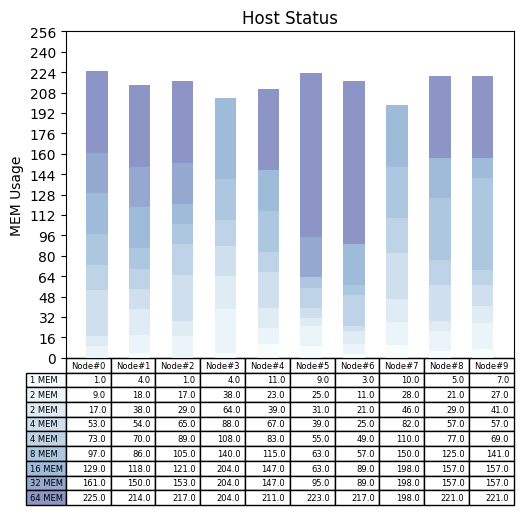

In [23]:
cs.plot_hosts_memory(ff,service_offerings)
cs.plot_hosts_memory(lc,service_offerings)
cs.plot_hosts_memory(ra,service_offerings)
cs.plot_hosts_memory(fa,service_offerings)

In [ ]:
cs.plot_hosts_CPU(ff,service_offerings)
cs.plot_hosts_CPU(lc,service_offerings)
cs.plot_hosts_CPU(ra,service_offerings)
cs.plot_hosts_CPU(fu,service_offerings)

In [ ]:
# Experiment eight

columns = []
DCs = []

for i in range(11):
    alpha = i/10
    DCs.append(cs.CloudStack(host_count=10, policy="fuzzy", alpha=alpha))
    columns.append(f'α={alpha}')
    
failed = [0]*len(DCs)
score = [0]*len(DCs)

for i in range(400):
    so = np.random.choice(service_offerings,1, p=distribution)[0]
    
    # Deploy VM in every DC
    for i, dc in enumerate(DCs):
        vm = dc.deploy_vm(f'VM#{i}' , so)
        if vm is None:
            failed[i] += 1
            score[i] -= (so['MAX_MEM'] + so['MAX_MEM'] // 4)
        else:
            score[i] += so['MAX_MEM']

display(pd.DataFrame([failed, score], columns = columns, index=pd.Series(['failed VMs','score'])))

In [55]:
# Experiment nine

failed = [0]*11
score = [0]*11

for i in range(100):
    columns = []
    DCs = []

    for i in range(11):
        alpha = i/10
        DCs.append(cs.CloudStack(host_count=10, policy="fuzzy", alpha=alpha))
        columns.append(f'α={alpha}')


    for i in range(400):
        so = np.random.choice(service_offerings,1, p=distribution)[0]

        # Deploy VM in every DC
        for i, dc in enumerate(DCs):
            vm = dc.deploy_vm(f'VM#{i}' , so)
            if vm is None:
                failed[i] += 1
                score[i] -= (so['MAX_MEM'] + so['MAX_MEM'] // 4)
            else:
                score[i] += so['MAX_MEM']

                
failed = np.array(failed)/100
score = np.array(score)/100
display(pd.DataFrame([failed, score], columns = columns, index=pd.Series(['failed VMs','score'])))

,α=0.0,α=0.1,α=0.2,α=0.3,α=0.4,α=0.5,α=0.6,α=0.7,α=0.8,α=0.9,α=1.0
failed VMs,11.51,12.88,13.94,15.46,16.48,17.90,20.46,22.7,24.42,26.78,27.63
score,1816.07,1834.01,1851.02,1866.56,1879.77,1896.94,1908.19,1922.9,1931.53,1938.95,1942.16
